# Data

In [93]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['c_bank.csv']
df = ds.to_dataframe()

In [94]:
import pandas as pd, scipy as sp
import re
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from scipy.stats import linregress

In [147]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [96]:
df.tail(11).T

,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
date,2016-07-16,2016-07-19,2016-07-20,2016-07-21,2016-07-22,2016-07-23,2016-07-26,2016-07-27,2016-07-28,2016-07-29,2016-07-30
monetary_gold,63497,63497,63497,63497,63497,63497,63497,63497,63497,63497,63497
foreign_exchange_reserves,329259,329259,329259,329259,329259,329259,329259,329259,329259,329259,329259
gold,2702.18,2691.03,2697.9,2702.82,2709.04,2749.35,2744.63,2792.61,2800.41,2851.02,2872.53
silver,40.9,40.02,40.48,40.17,39.63,40.93,40.51,41.6,41.51,43.38,43.2
platinum,2225.92,2201.69,2207.41,2208.18,2227.48,2273.12,2237.45,2297.5,2321.66,2442.27,2431.68
palladium,1314.03,1290.57,1302.17,1331.43,1368.87,1412.91,1406.75,1445.71,1454.48,1496.4,1498.24
dual_currency_basket,66.3961,66.1118,66.0078,66.2436,66.6915,67.6079,67.7492,68.714,68.9024,69.394,70.3491
EUR_978,70.3395,69.7741,69.6974,69.6967,70.3022,71.2513,71.209,72.3478,72.515,73.4047,74.3799
USD_840,63.1697,63.1154,62.9891,63.4183,63.7373,64.627,64.9184,65.7408,65.9467,66.1125,67.0512


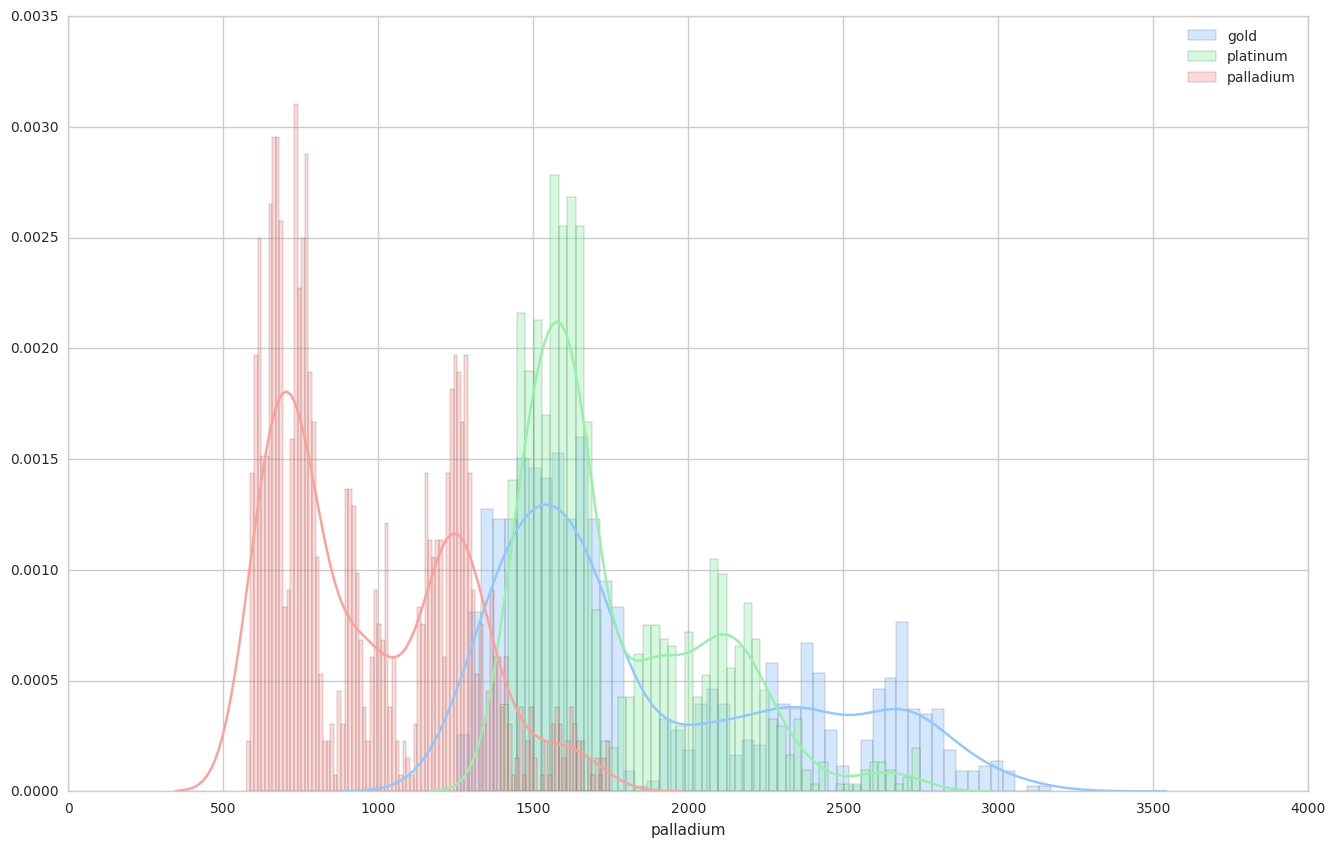

In [97]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,10))
sns.distplot(df.gold, bins=50)
sns.distplot(df.platinum, bins=50)
sns.distplot(df.palladium, bins=100)
plt.legend(['gold', 'platinum', 'palladium'])

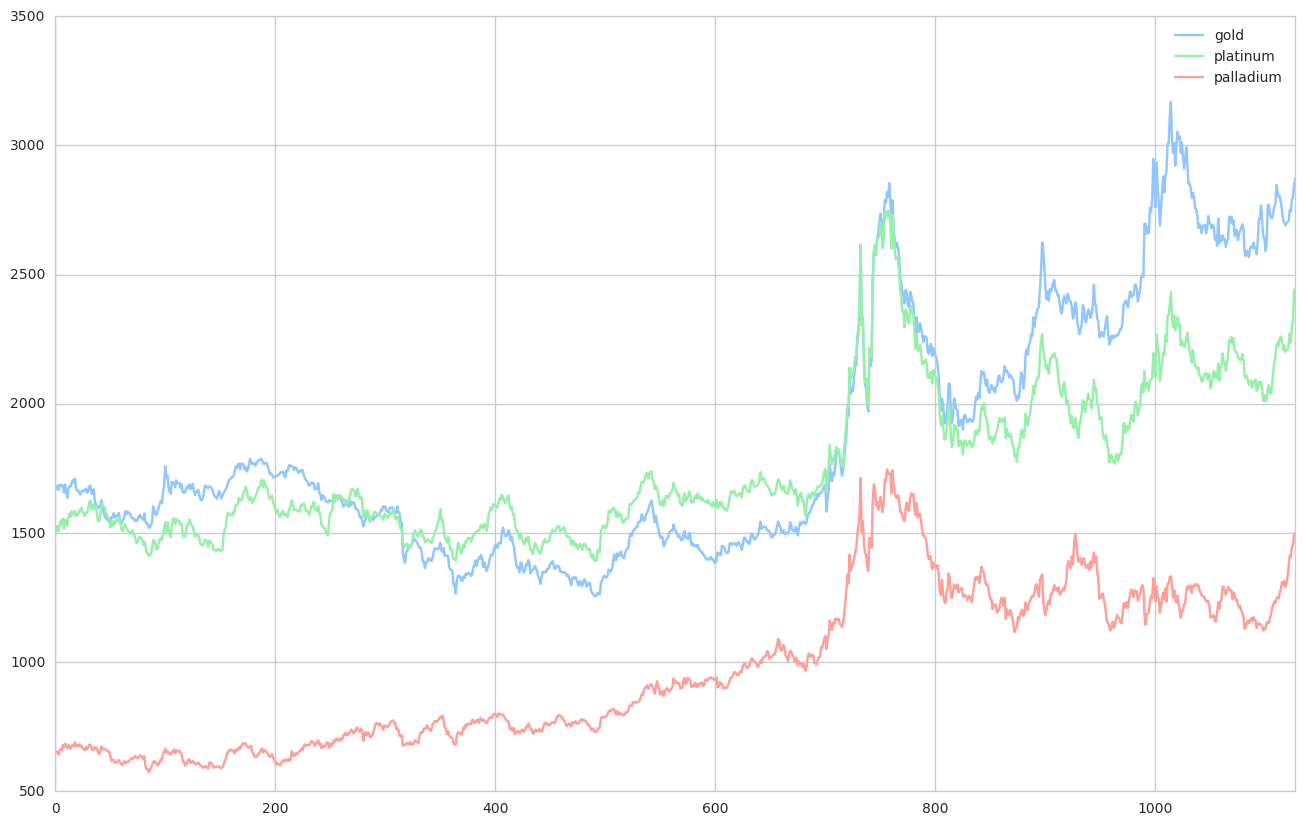

In [98]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(16,10))
df.gold.plot()
df.platinum.plot()
df.palladium.plot()
plt.legend(['gold', 'platinum', 'palladium'])

In [99]:
finance_df=df.drop('date', 1)

In [100]:
metal_list=['silver', 'palladium', 'platinum', 'gold']
dual_metal_list=['dual_currency_basket', 'palladium', 'platinum', 'gold']
ex_metal_list=['silver', 'palladium', 'platinum', 'gold','foreign_exchange_reserves', 'monetary_gold']

In [101]:
metal = finance_df[metal_list]
dual_metal = finance_df[dual_metal_list]
ex_metal = finance_df[ex_metal_list]
silver = finance_df['silver']
dual_cb = finance_df['dual_currency_basket']

# Correlation

In [102]:
pearson = finance_df.corr(method='pearson')
pearson

,monetary_gold,foreign_exchange_reserves,gold,silver,platinum,palladium,dual_currency_basket,EUR_978,USD_840,JPY_392,CNY_156,INR_356,BRL_986
monetary_gold,1.000000,-0.394231,0.668599,0.791867,0.465668,0.249417,0.454029,0.429472,0.470768,0.640527,0.429597,0.497368,0.392988
foreign_exchange_reserves,-0.394231,1.000000,-0.854686,-0.496228,-0.851989,-0.913144,-0.930809,-0.914110,-0.939469,-0.835952,-0.946844,-0.935324,-0.724702
gold,0.668599,-0.854686,1.000000,0.818134,0.910168,0.775609,0.932027,0.916935,0.939457,0.981823,0.924083,0.956538,0.808894
silver,0.791867,-0.496228,0.818134,1.000000,0.667066,0.390428,0.574367,0.546195,0.593336,0.782951,0.561458,0.658601,0.640726
platinum,0.465668,-0.851989,0.910168,0.667066,1.000000,0.912967,0.901795,0.903444,0.896590,0.854829,0.900461,0.913943,0.897346
palladium,0.249417,-0.913144,0.775609,0.390428,0.912967,1.000000,0.885983,0.889179,0.879669,0.726822,0.899559,0.874385,0.794179
dual_currency_basket,0.454029,-0.930809,0.932027,0.574367,0.901795,0.885983,1.000000,0.996743,0.998107,0.931162,0.996703,0.983591,0.767005
EUR_978,0.429472,-0.914110,0.916935,0.546195,0.903444,0.889179,0.996743,1.000000,0.989897,0.916783,0.989375,0.970946,0.766801
USD_840,0.470768,-0.939469,0.939457,0.593336,0.896590,0.879669,0.998107,0.989897,1.000000,0.938051,0.997929,0.988929,0.763803
JPY_392,0.640527,-0.835952,0.981823,0.782951,0.854829,0.726822,0.931162,0.916783,0.938051,1.000000,0.918291,0.945038,0.763585


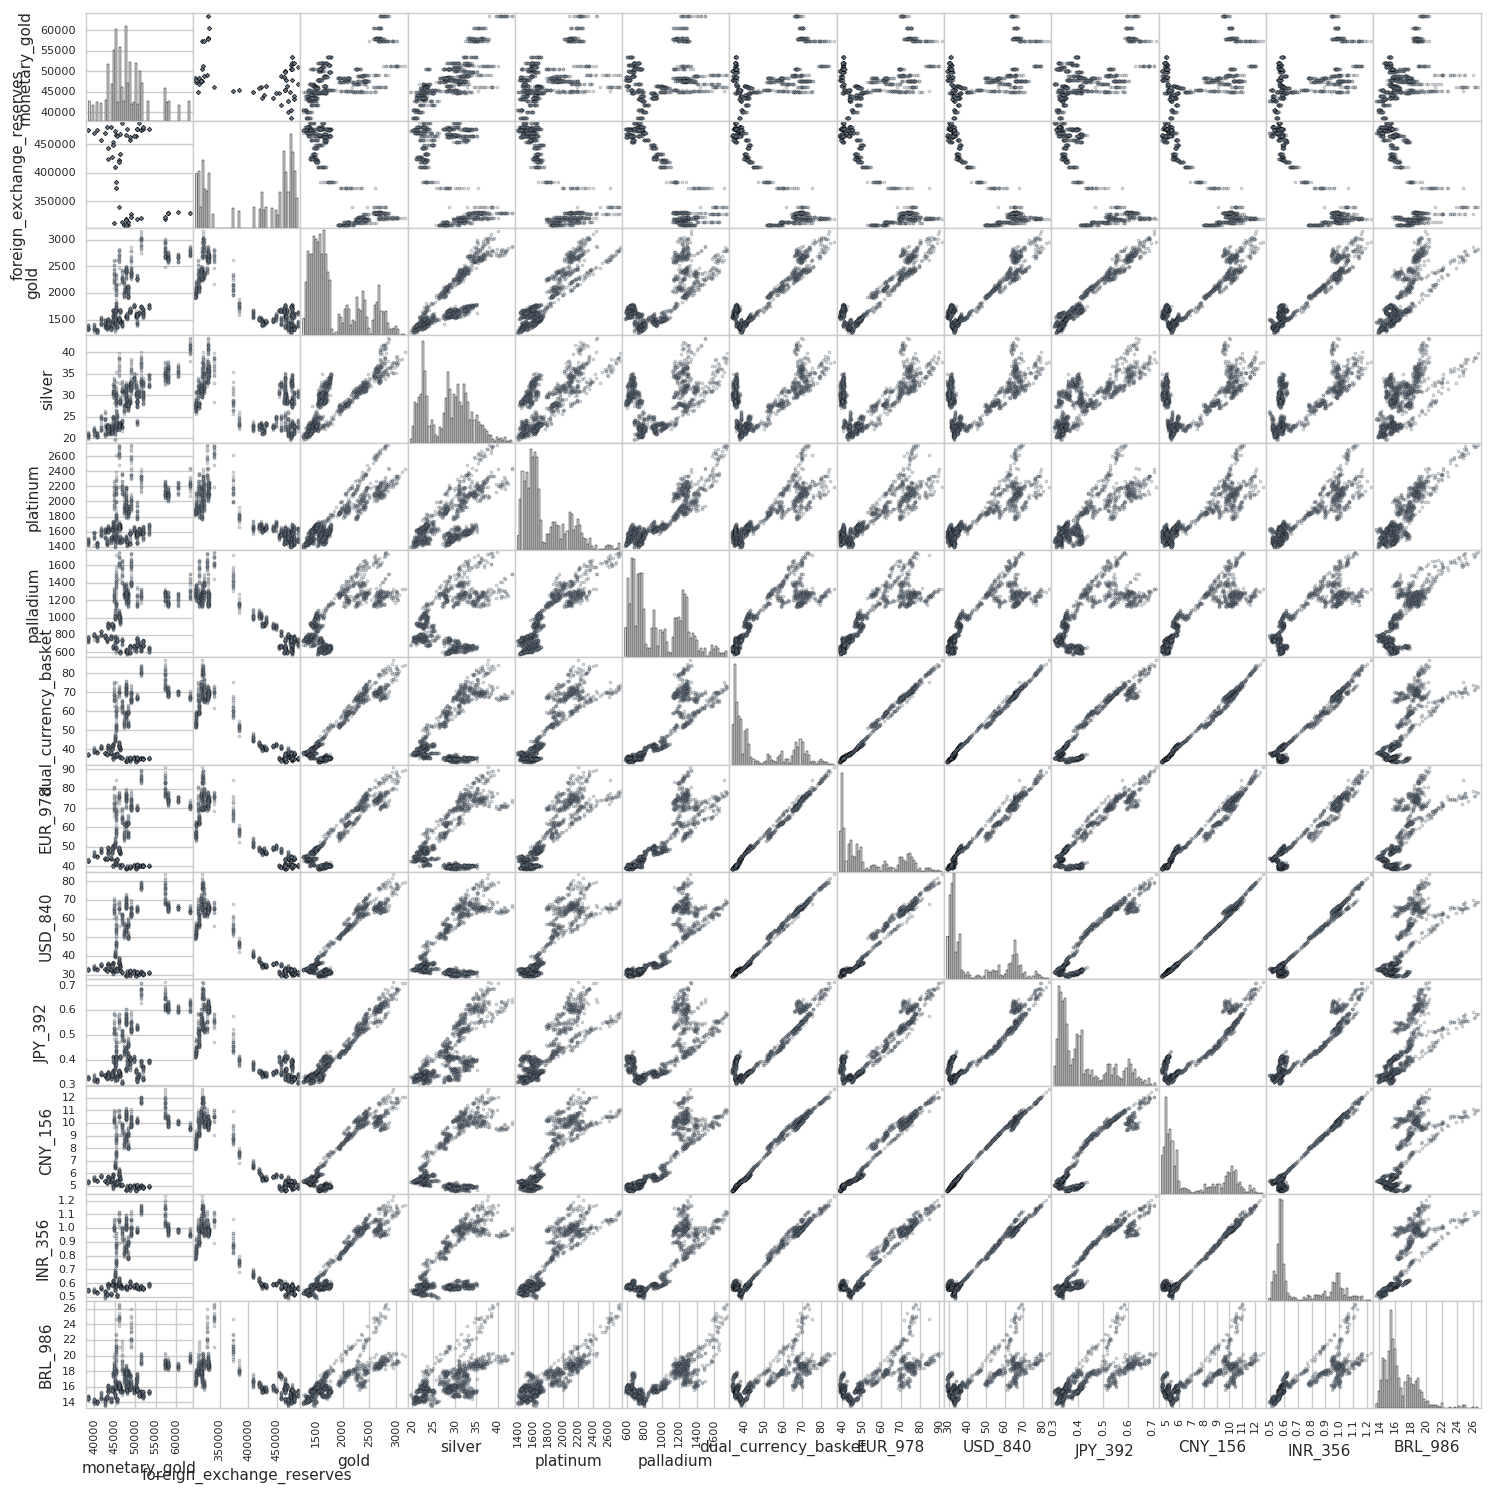

In [103]:
pd.scatter_matrix(finance_df, alpha = 0.3, figsize = (18,18), diagonal = 'hist',
                  c="SlateGrey", hist_kwds={'color':'LightGrey','bins':50});

# Standardization, Min-Max Scaling, Normalization

In [104]:
# Examples numpy
'''
import numpy as np

# Standardization

x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

# Min-Max scaling

np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
'''

'\nimport numpy as np\n\n# Standardization\n\nx_np = np.asarray(x)\nz_scores_np = (x_np - x_np.mean()) / x_np.std()\n\n# Min-Max scaling\n\nnp_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())\n'

In [105]:
df.ix[1, 1:]/df.ix[0, 1:]

monetary_gold                       1
foreign_exchange_reserves           1
gold                          1.00277
silver                        1.02334
platinum                      1.01193
palladium                     1.00678
dual_currency_basket         0.992746
EUR_978                      0.991339
USD_840                      0.994218
JPY_392                      0.992859
CNY_156                      0.993603
INR_356                       1.00548
BRL_986                       1.01261
dtype: object

In [106]:
def normalize_data(df):
    norm_df = df.ix[:, 1:]/ df.ix[0, 1:]
    
    return norm_df

In [107]:
n_df = normalize_data(df)

norm_df = n_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

In [108]:
norm_df['date']=df['date']
norm_df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
monetary_gold,1,1,1,1,1,1,1,1,1,1,1
foreign_exchange_reserves,1,1,1,1,1,1,1,1,1,1,1
gold,1,1.00277,1.00955,1.00004,1.01209,1.01098,1.00789,1.01006,0.993108,1.01204,0.993702
silver,1,1.02334,1.02706,1.05041,1.02943,1.02571,1.0433,1.03214,1.0477,1.03451,1.08965
platinum,1,1.01193,1.02191,1.0072,1.02253,1.03515,1.0256,1.0404,1.01394,1.03762,1.02912
palladium,1,1.00678,1.00654,0.989332,1.01301,1.02097,1.01466,1.04611,1.03592,1.05448,1.0391
dual_currency_basket,1,0.992746,0.991107,0.993797,0.996239,0.987558,0.988693,0.990405,0.988869,0.987291,0.977528
EUR_978,1,0.991339,0.988373,0.99656,0.990802,0.985517,0.987784,0.993084,0.99577,0.991347,0.985969
USD_840,1,0.994218,0.99397,0.990904,1.00193,0.989697,0.989643,0.987601,0.981646,0.983045,0.968698
JPY_392,1,0.992859,0.992934,0.991936,1.00219,0.992408,0.991191,0.988887,0.977319,0.97992,0.96612


In [109]:
norm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
monetary_gold,1128.0,1.076577,0.111086,0.862407,1.007137,1.066738,1.128510,1.420610
foreign_exchange_reserves,1128.0,0.902748,0.150955,0.677865,0.720664,0.975381,1.042826,1.071871
gold,1128.0,1.116758,0.286956,0.752833,0.895454,0.999571,1.357491,1.900099
silver,1128.0,0.963656,0.175735,0.662043,0.783491,0.971414,1.091509,1.467524
platinum,1128.0,1.179598,0.195518,0.931088,1.034755,1.099168,1.321031,1.837140
palladium,1128.0,1.493852,0.455911,0.886551,1.090483,1.394544,1.904927,2.691225
dual_currency_basket,1128.0,1.351030,0.418652,0.928384,0.995931,1.131588,1.813278,2.425500
EUR_978,1128.0,1.315776,0.355124,0.942408,0.996851,1.166382,1.693427,2.237081
USD_840,1128.0,1.387917,0.487254,0.908195,0.997867,1.098668,1.929925,2.622645
JPY_392,1128.0,1.023972,0.251818,0.732088,0.818551,0.942177,1.230062,1.720616


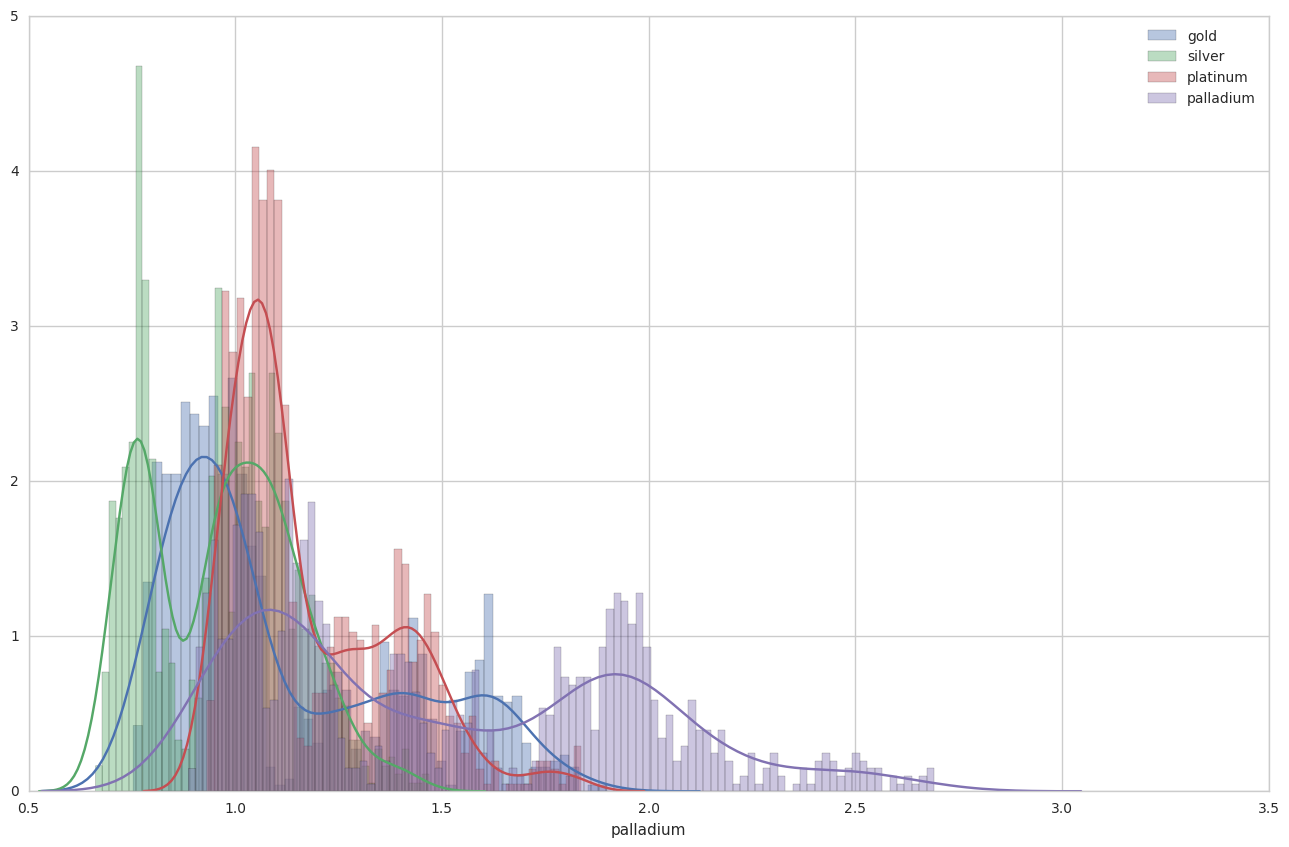

In [110]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(16,10))
sns.distplot(norm_df.gold, bins=50)
sns.distplot(norm_df.silver, bins=50)
sns.distplot(norm_df.platinum, bins=50)
sns.distplot(norm_df.palladium, bins=100)
plt.legend(['gold', 'silver', 'platinum', 'palladium'])

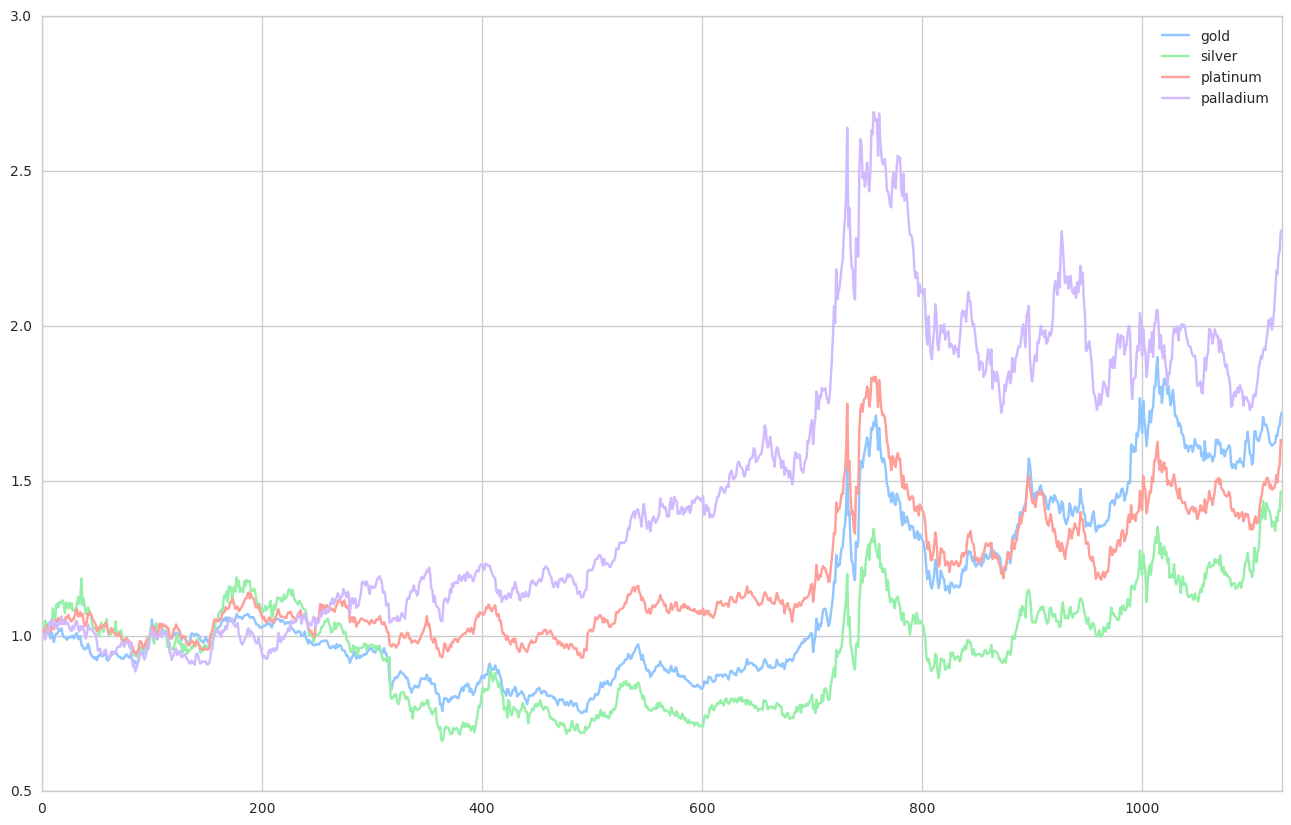

In [111]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(16,10))
norm_df.gold.plot()
norm_df.silver.plot()
norm_df.platinum.plot()
norm_df.palladium.plot()
plt.legend(['gold', 'silver', 'platinum', 'palladium'])

In [112]:
norm_finance_df = norm_df.drop('date', 1)
norm_finance_df.head().T

,0,1,2,3,4
monetary_gold,1.0,1.000000,1.000000,1.000000,1.000000
foreign_exchange_reserves,1.0,1.000000,1.000000,1.000000,1.000000
gold,1.0,1.002771,1.009549,1.000036,1.012086
silver,1.0,1.023342,1.027064,1.050406,1.029432
platinum,1.0,1.011932,1.021905,1.007204,1.022534
palladium,1.0,1.006783,1.006537,0.989332,1.013011
dual_currency_basket,1.0,0.992746,0.991107,0.993797,0.996239
EUR_978,1.0,0.991339,0.988373,0.996560,0.990802
USD_840,1.0,0.994218,0.993970,0.990904,1.001930
JPY_392,1.0,0.992859,0.992934,0.991936,1.002191


# Linear models

### SciPy Polyfit

In [113]:
x = np.array(norm_df.dual_currency_basket)
y = np.array(norm_df.gold)

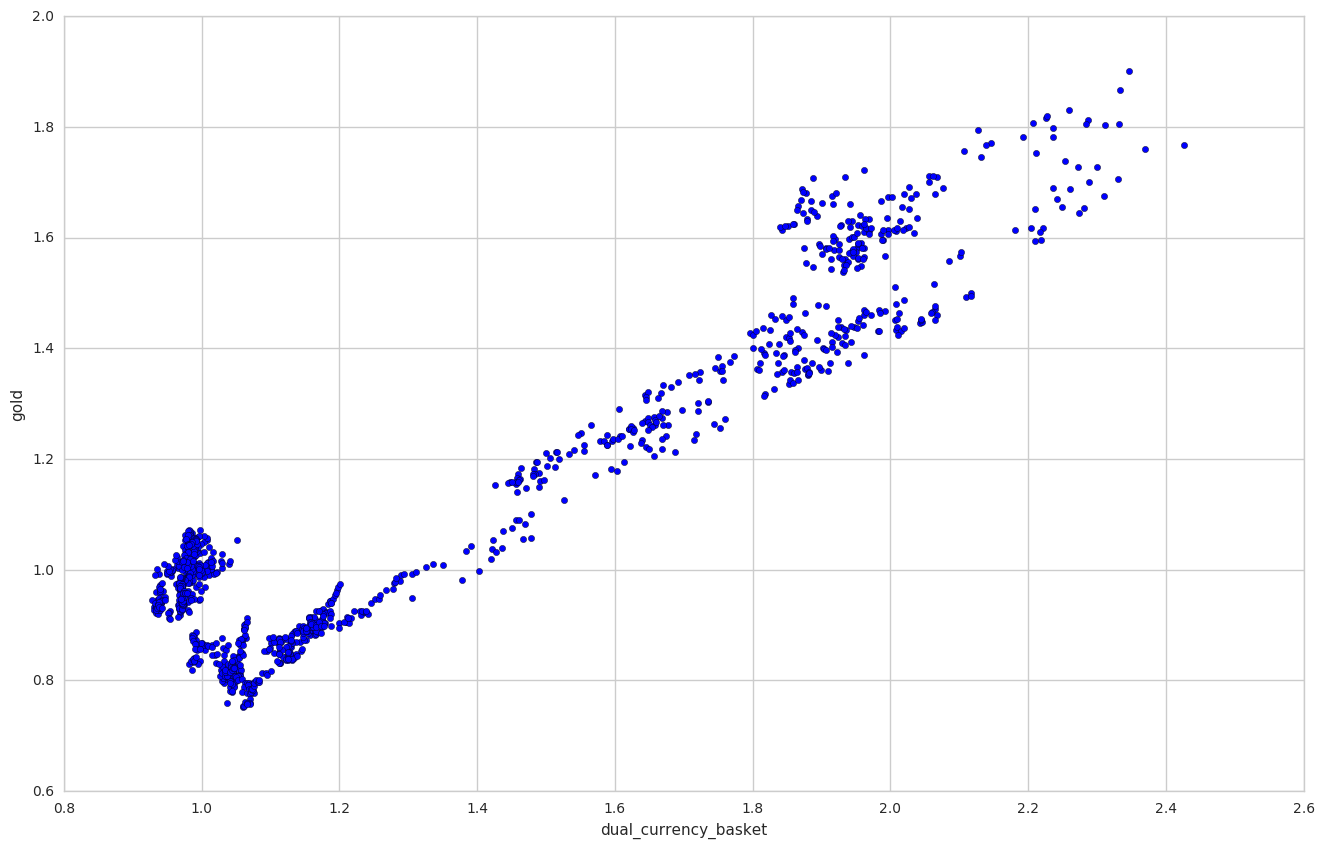

In [114]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(16,10))
plt.scatter(x,y)
plt.xlabel("dual_currency_basket")
plt.ylabel("gold")

In [184]:
fp1 = sp.polyfit(x, y, 1)
f1 = sp.poly1d(fp1)

In [185]:
print("Model parameters: %s" %  fp1)

Model parameters: [ 0.63883751  0.25366971]


In [186]:
fp2 = sp.polyfit(x, y, 5)
f2 = sp.poly1d(fp2)

In [187]:
fp3 = sp.polyfit(x, y, 10)
f3 = sp.poly1d(fp3)

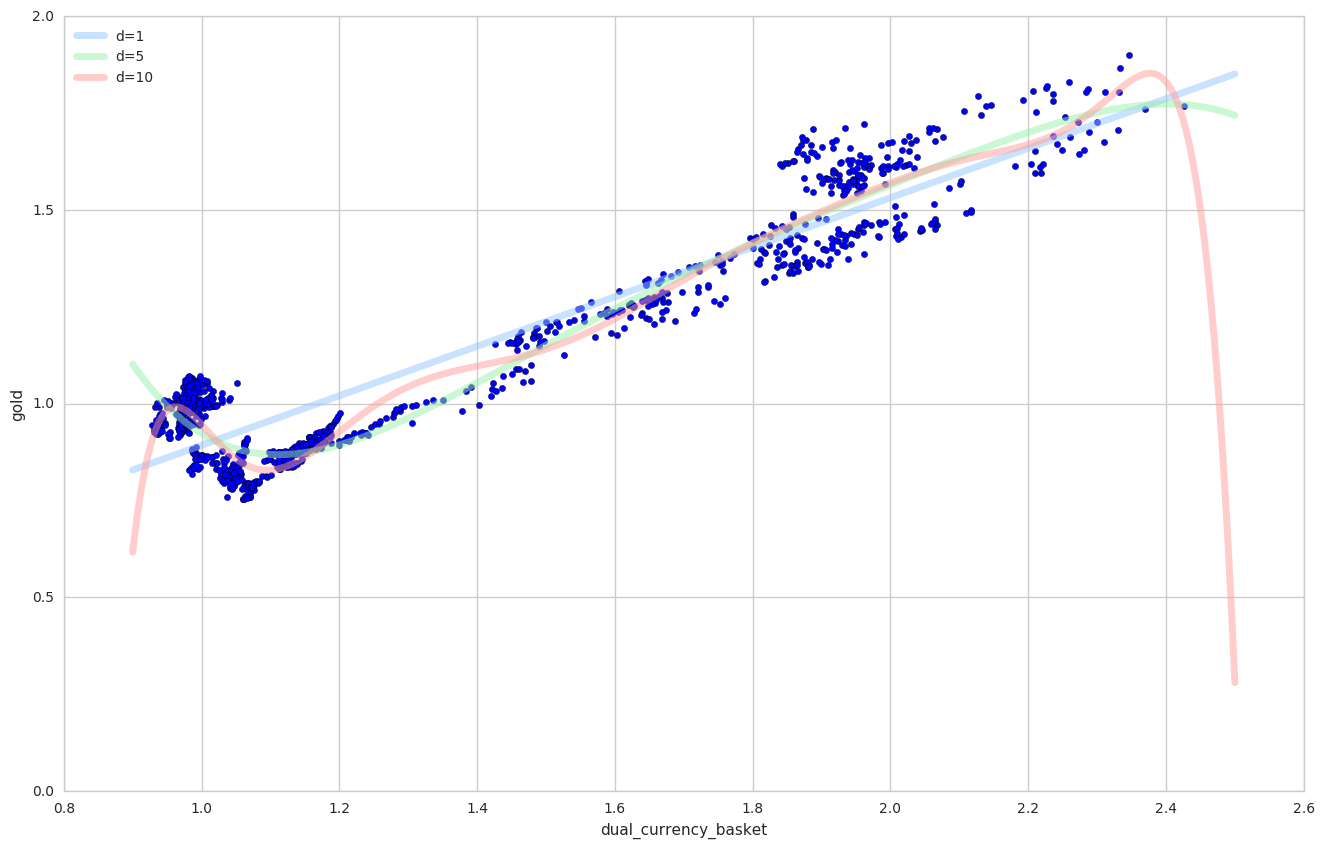

In [188]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(16,10))
plt.scatter(x,y)
fx = sp.linspace(0.9, 2.5, 1000) 
plt.plot(fx, f1(fx), linewidth=5, alpha=0.5)
plt.plot(fx, f2(fx), linewidth=5, alpha=0.5)
plt.plot(fx, f3(fx), linewidth=5, alpha=0.5)
plt.legend(["d=%i"%f1.order, "d=%i"%f2.order, "d=%i"%f3.order], loc="upper left")
plt.xlabel("dual_currency_basket")
plt.ylabel("gold")

### Numpy Regression

In [197]:
# One-dimensional
X = np.array(norm_df.dual_currency_basket)
X = np.array([[v,1] for v in X])
Y = np.array(norm_df.gold)

In [198]:
(slope,bias),total_error,_,_ = np.linalg.lstsq(X,Y)

In [199]:
rmse = np.sqrt(total_error[0]/len(X))
rmse

0.10394358882694534

In [204]:
# Multidimensional regression
XMD = np.array(norm_df[metal_list])
YMD = np.array(norm_df.dual_currency_basket)
sMD,total_errorMD,_,_ = np.linalg.lstsq(XMD,YMD)

In [205]:
rmseMD = np.sqrt(total_errorMD[0]/len(X))
rmseMD

0.070968410851359645

### Built Functions

In [118]:
# Function for normalizing the features 
def normalize_features(data):
    mu, sigma = data.mean(), data.std()
    
    if (sigma == 0).any():
        raise Exception("One of the features had the same value for all samples and could not be normalized." +  
                        "Do not include features with only a single value in the model.")
        
    data_normalized = (data - mu) / sigma
    return data_normalized, mu, sigma

# Cost function
def compute_cost(features, values, theta):
    
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2 * len(values))

    return cost

# Gradient descent function
def gradient_descent(features, values, theta, alpha, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        delta = (np.dot((values - np.dot(features, theta)), features)) / len(values)
        theta = theta + alpha * delta
        cost_history.append(compute_cost(features, values, theta))

    return theta, pd.Series(cost_history)

# Gradient descent function
def predictions(features, values):

    # Normalize features
    features, mu, sigma = normalize_features(features)
    
    # Add a column of 1s (y intercept)
    features['ones'] = np.ones(len(values))
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 
    num_iterations = 50 

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = \
    gradient_descent(features_array, values_array, theta_gradient_descent, alpha, num_iterations)
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, theta_gradient_descent

In [119]:
predict = predictions(metal, dual_cb)
print ("Predictions for 'dual_currency_basket'")
predict[0]

Predictions for 'dual_currency_basket'


array([ 36.43584791,  36.61138559,  36.91428645, ...,  74.30530783,
        76.65929512,  76.96072321])

In [120]:
print ('Coefficients')
print ('silver {}'.format(predict[1][1]))
print ('palladium {}'.format(predict[1][2]))
print ('platinum {}'.format(predict[1][3]))
print ('gold {}'.format(predict[1][4]))

Coefficients
silver 5.26441366099
palladium 3.02666851152
platinum 7.48744644152
gold 48.2139684961


In [121]:
print ("sklearn.metrics, R^2 = {}".format(r2_score(dual_cb, predict[0])))
slope, intercept, r_value, p_value, std_err = linregress(dual_cb, predict[0])
print ("scipy.stats, R^2 = {}".format(r_value**2))

sklearn.metrics, R^2 = 0.929021786477
scipy.stats, R^2 = 0.929674030279


<module 'matplotlib.pyplot' from '/home/nbuser/anaconda2_20/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

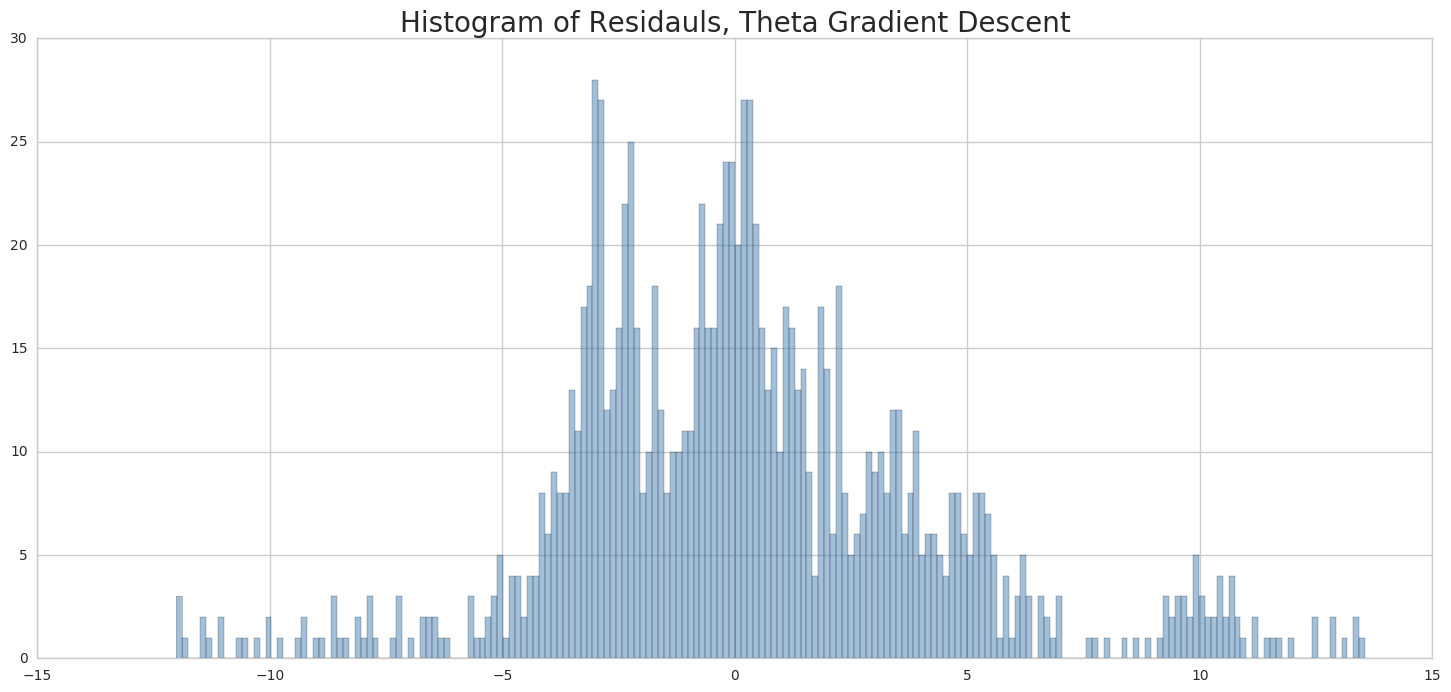

In [122]:
def plot_residuals(data, predictions):
    matplotlib.rcParams['figure.figsize'] = (18, 8)
    plt.style.use('seaborn-whitegrid')
    plt.figure()
    (data - predictions).hist(bins=200, color='steelblue', edgecolor='black', alpha=0.5)

    plt.title("Histogram of Residauls, Theta Gradient Descent", fontsize=20)
    return plt

plot_residuals(dual_cb, predict[0])

In [123]:
predict2 = predictions(ex_metal, dual_cb)
print ("Predictions for 'dual_currency_basket', more features")
predict2[0]

Predictions for 'dual_currency_basket', more features


array([ 37.29039913,  37.4162678 ,  37.6503904 , ...,  72.17639224,
        73.84805293,  74.06746387])

In [124]:
print ('Coefficients, more features')
print ('silver {}'.format(predict2[1][1]))
print ('palladium {}'.format(predict2[1][2]))
print ('platinum {}'.format(predict2[1][3]))
print ('gold {}'.format(predict2[1][4]))
print ('foreign_exchange_reserves {}'.format(predict2[1][5]))
print ('monetary_gold {}'.format(predict2[1][6]))

Coefficients, more features
silver 2.92886753039
palladium 2.34706665786
platinum 5.6934180465
gold -4.78446776057
foreign_exchange_reserves 0.0225597429385
monetary_gold 48.2139684961


In [125]:
print ("sklearn.metrics, more features, R^2 = {}".format(r2_score(dual_cb, predict2[0])))
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(dual_cb, predict2[0])
print ("scipy.stats, more features, R^2 = {}".format(r_value2**2))

sklearn.metrics, more features, R^2 = 0.94154630945
scipy.stats, more features, R^2 = 0.941952457352


<module 'matplotlib.pyplot' from '/home/nbuser/anaconda2_20/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

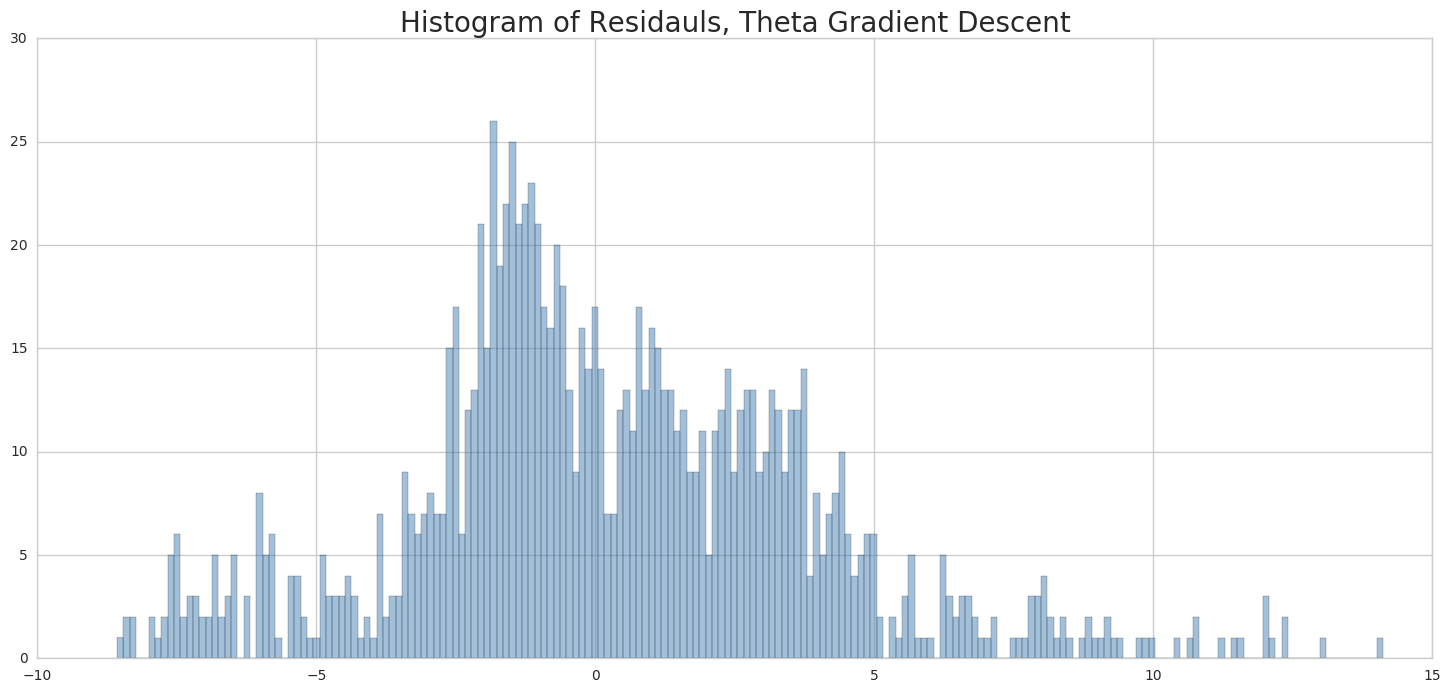

In [126]:
plot_residuals(dual_cb, predict2[0])

In [127]:
predict3 = predictions(dual_metal, silver)
print ("Predictions for 'silver'")
predict3[0]

Predictions for 'silver'


array([ 27.75707777,  27.8854829 ,  28.0866415 , ...,  36.01174991,
        36.89568506,  36.98233885])

In [128]:
print ('Coefficients, silver')
print ('dual_currency_basket {}'.format(predict3[1][1]))
print ('palladium {}'.format(predict3[1][2]))
print ('platinum {}'.format(predict3[1][3]))
print ('gold {}'.format(predict3[1][4]))

Coefficients, silver
dual_currency_basket -2.35429106512
palladium 1.86708615414
platinum 4.36019509252
gold 28.3388561801


In [129]:
print ("sklearn.metrics, silver, R^2 = {}".format(r2_score(silver, predict3[0])))
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(silver, predict3[0])
print ("scipy.stats, silver, R^2 = {}".format(r_value3**2))

sklearn.metrics, silver, R^2 = 0.812174070528
scipy.stats, silver, R^2 = 0.83362616008


<module 'matplotlib.pyplot' from '/home/nbuser/anaconda2_20/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

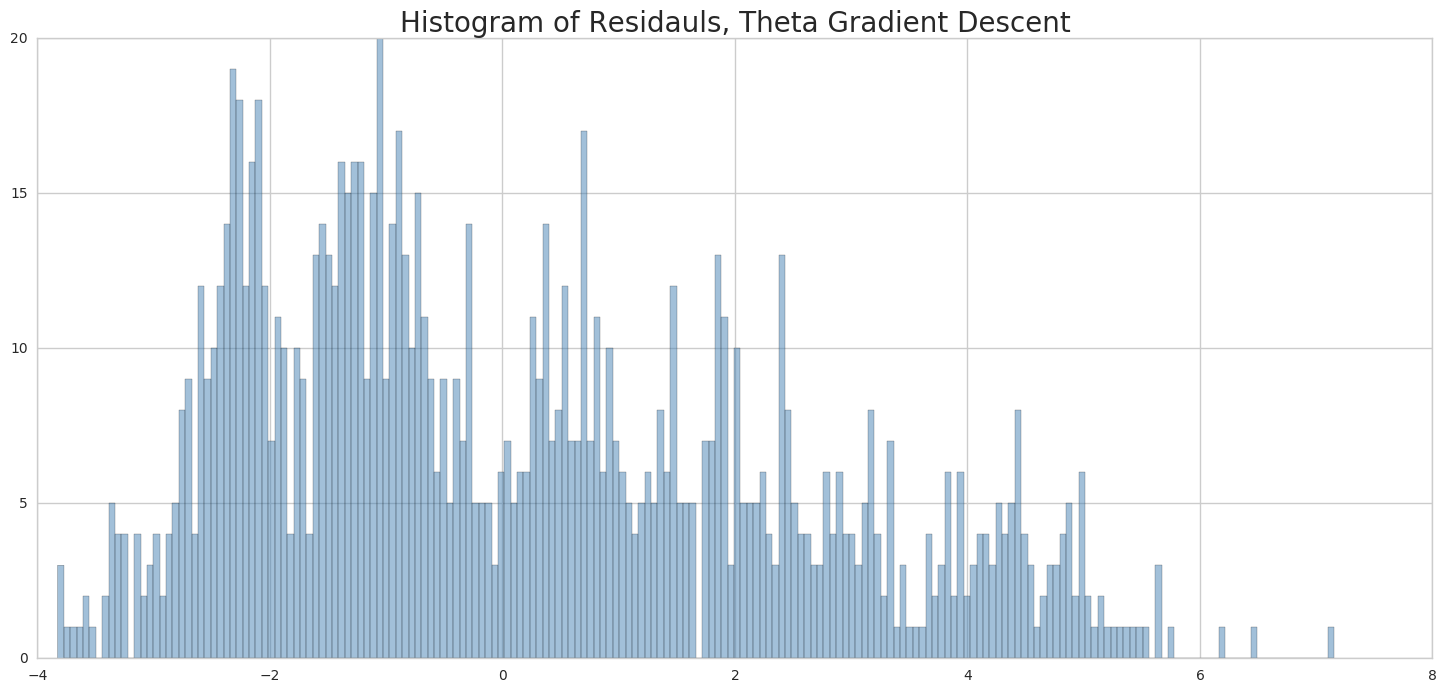

In [130]:
plot_residuals(silver, predict3[0])

### OLS Model

In [131]:
def ols_predictions(data, target):
    # Normalize features
    X, mu, sigma = normalize_features(data)
    X = sm.add_constant(X)
    y = target
    
    # Fit ordinary least squares model
    model = sm.OLS(y,X)
    results = model.fit()
    predictions = results.predict(X)
    coefficients = results.params
    r2 = results.rsquared
    return predictions, coefficients, r2

In [132]:
ols_predict = ols_predictions(metal, dual_cb)
print ("Predictions for 'dual_currency_basket'")
ols_predict[0]

Predictions for 'dual_currency_basket'


array([ 37.90376636,  37.10882064,  37.30429835, ...,  69.95731642,
        69.10466136,  70.29075118])

In [133]:
print ('Coefficients')
ols_predict[1]

Coefficients


const        48.463740
silver       -6.731984
palladium     3.139671
platinum     -2.149718
gold         19.026072
dtype: float64

In [134]:
print ('OLS model, R^2 = {}'.format(ols_predict[2]))

OLS model, R^2 = 0.979458337055


In [135]:
ols_predict3 = ols_predictions(dual_metal, silver)
print ("Predictions for 'silver'")
ols_predict3[0]

Predictions for 'silver'


array([ 30.07583123,  30.32557607,  30.63653243, ...,  39.97467496,
        41.04388728,  41.05673305])

In [136]:
print ('Coefficients')
ols_predict3[1]

Coefficients


const                   28.485665
dual_currency_basket    -6.760503
palladium               -0.778323
platinum                 0.698218
gold                    10.519128
dtype: float64

In [137]:
print ('OLS model, R^2 = {}'.format(ols_predict3[2]))

OLS model, R^2 = 0.940363179212


### SGDRegressor

In [138]:
def sgd_predictions(data, target):
    
    # Normalize features
    X, mu, sigma = normalize_features(data)
    y = target
    
    # Fit the model
    clf = linear_model.SGDRegressor()
    clf.fit(X, y)

    coefficients = clf.coef_
    r2 = clf.score(X, y)
    return clf.predict(X), coefficients, r2

In [139]:
sgd_predict = sgd_predictions(metal, dual_cb)
print ("Predictions for 'dual_currency_basket'")
sgd_predict[0]

Predictions for 'dual_currency_basket'


array([ 35.83015825,  36.29598643,  36.63233028, ...,  77.94824569,
        81.38447887,  81.42749647])

In [140]:
print ('Coefficients')
print ('silver {}'.format(sgd_predict[1][0]))
print ('palladium {}'.format(sgd_predict[1][1]))
print ('platinum {}'.format(sgd_predict[1][2]))
print ('gold {}'.format(sgd_predict[1][3]))

Coefficients
silver 0.293334062645
palladium 6.85826159126
platinum 4.68774351152
gold 4.01108513496


In [141]:
print ('SGDRegressor, R^2 = {}'.format(sgd_predict[2]))

SGDRegressor, R^2 = 0.887896277976


In [142]:
sgd_predict3 = sgd_predictions(dual_metal, silver)
print ("Predictions for 'silver'")
sgd_predict3[0]

Predictions for 'silver'


array([ 26.36583514,  26.69018482,  27.02942941, ...,  38.99627041,
        40.88961836,  40.77167688])

In [143]:
print ('Coefficients')
print ('dual_currency_basket {}'.format(sgd_predict3[1][0]))
print ('palladium {}'.format(sgd_predict3[1][1]))
print ('platinum {}'.format(sgd_predict3[1][2]))
print ('gold {}'.format(sgd_predict3[1][3]))

Coefficients
dual_currency_basket -2.90772124689
palladium -1.6175498208
platinum 4.09074308219
gold 5.00996342664


In [144]:
print ('SGDRegressor, R^2 = {}'.format(sgd_predict3[2]))

SGDRegressor, R^2 = 0.795727502383


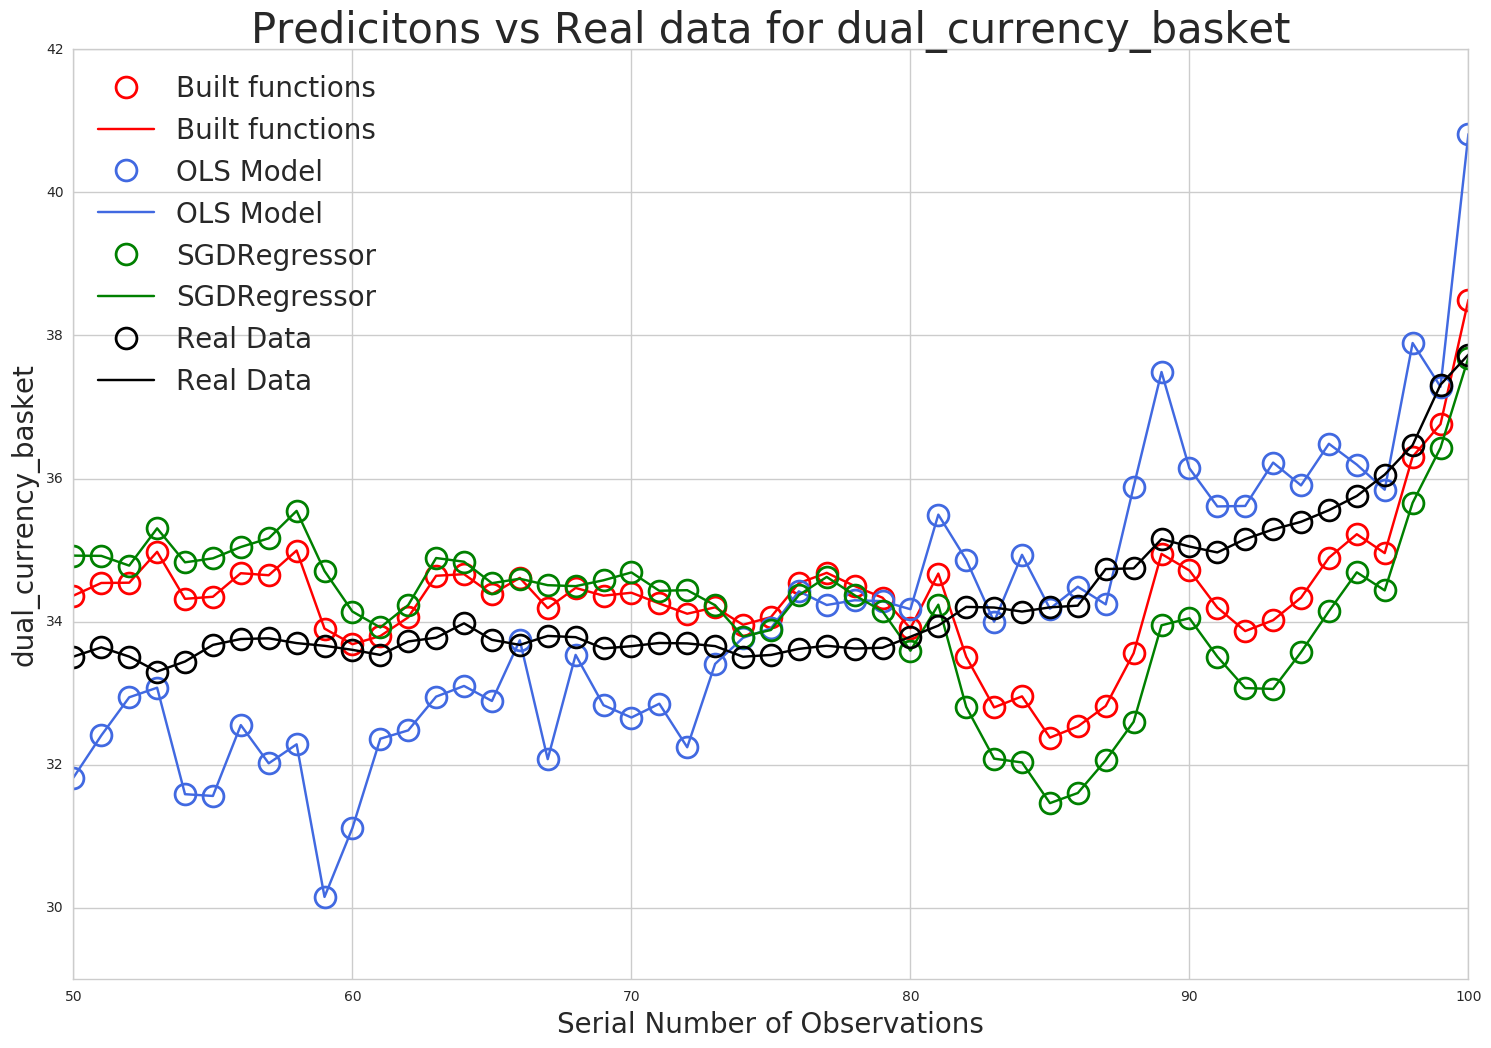

In [145]:
matplotlib.rcParams['figure.figsize'] = (18, 12)
plt.style.use('seaborn-bright')

plt.figure()

plt.plot(predict[0], 'o', markersize=15, 
         markeredgecolor='red', markerfacecolor="None", markeredgewidth=2)
plt.plot(predict[0], color='red')

plt.plot(ols_predict[0], 'o', markersize=15, 
         markeredgecolor='royalblue', markerfacecolor="None", markeredgewidth=2)
plt.plot(ols_predict[0], color='royalblue')

plt.plot(sgd_predict[0], 'o', markersize=15, 
         markeredgecolor='green', markerfacecolor="None", markeredgewidth=2)
plt.plot(sgd_predict[0], color='green')

plt.plot(dual_cb, 'o', markersize=15, 
         markeredgecolor='black', markerfacecolor="None", markeredgewidth=2)
plt.plot(dual_cb, color='black')

plt.axis((50, 100, 29, 42))
plt.xlabel('Serial Number of Observations', fontsize=20)
plt.ylabel('dual_currency_basket', fontsize=20)
plt.title('Predicitons vs Real data for dual_currency_basket', fontsize=30)
plt.legend(['Built functions','Built functions','OLS Model', 'OLS Model',
            'SGDRegressor', 'SGDRegressor', 'Real Data', 'Real Data'], fontsize=20, loc=2)

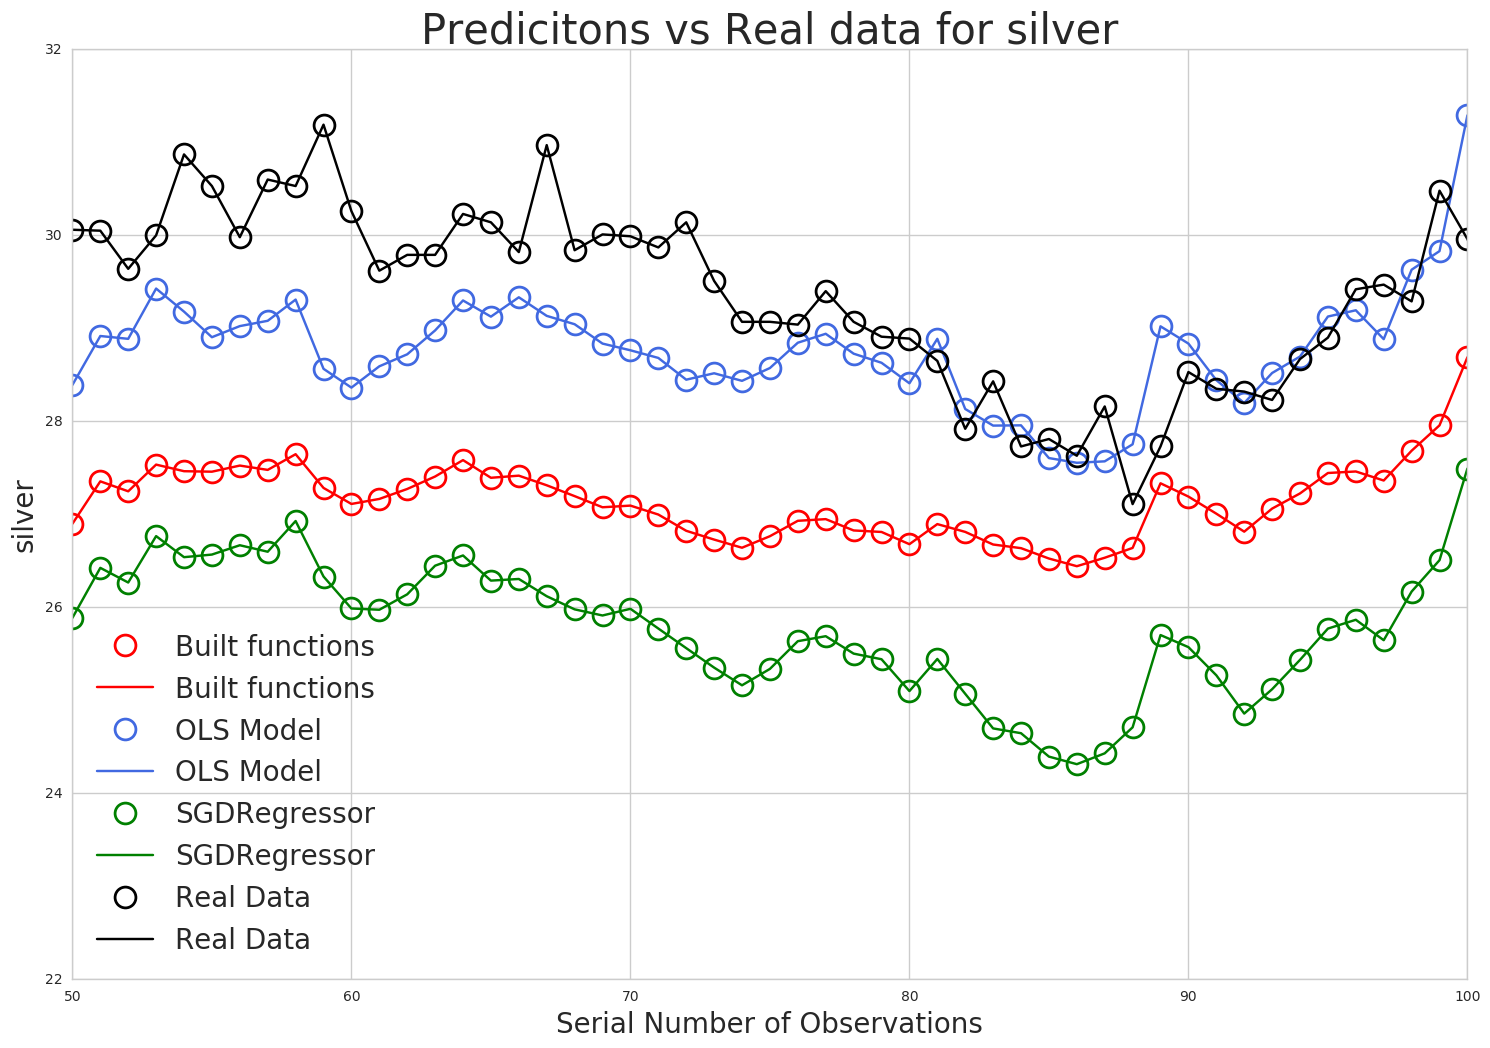

In [146]:
matplotlib.rcParams['figure.figsize'] = (18, 12)
plt.style.use('seaborn-bright')

plt.figure()

plt.plot(predict3[0], 'o', markersize=15, 
         markeredgecolor='red', markerfacecolor="None", markeredgewidth=2)
plt.plot(predict3[0], color='red')

plt.plot(ols_predict3[0], 'o', markersize=15, 
         markeredgecolor='royalblue', markerfacecolor="None", markeredgewidth=2)
plt.plot(ols_predict3[0], color='royalblue')

plt.plot(sgd_predict3[0], 'o', markersize=15, 
         markeredgecolor='green', markerfacecolor="None", markeredgewidth=2)
plt.plot(sgd_predict3[0], color='green')

plt.plot(silver, 'o', markersize=15, 
         markeredgecolor='black', markerfacecolor="None", markeredgewidth=2)
plt.plot(silver, color='black')

plt.axis((50, 100, 22, 32))
plt.xlabel('Serial Number of Observations', fontsize=20)
plt.ylabel('silver', fontsize=20)
plt.title('Predicitons vs Real data for silver', fontsize=30)
plt.legend(['Built functions','Built functions','OLS Model', 'OLS Model',
            'SGDRegressor', 'SGDRegressor', 'Real Data', 'Real Data'], fontsize=20, loc=3)